# Hipotesis sobre propinas en restaurantes de estados unidos
Hare hipotesis para saber quien da mas o menos propinas, si depende del genero, del sexo del camarero, la cantidad de la propina etc
Por cada apartado voy a poner varios ejemplos

In [16]:
import pandas as pd

datos = pd.read_csv('tips.csv')


# Hipótesis respecto a un valor:
Como es basado en estados unidos yo creo que la propina promedio sera superior a 2.50$
Si la propina promedio es mayor que $2.50, la hipótesis nula sería que la propina promedio es igual a $2.50:

In [19]:
from pingouin import ttest

ttest(datos['tip'], 2.5)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,5.625287,243,two-sided,5.079988e-08,"[2.82, 3.17]",0.360122,1.753e+05,0.999865


Como Sale que p-val inferior a 0.05 se rechaza la hipotesis nula, por lo tanto la propina promedio es mayor que $2.50.

Vamos con otro ejemplo como que de media la factura total es de 20 dolares

In [21]:
ttest(datos['total_bill'], 20)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.375593,243,two-sided,0.707547,"[18.66, 20.91]",0.024045,0.077,0.066182


Ahora si que da un p-val superior a 0.05, por lo tanto no se rechaza la hipotesis nula, por lo tanto la media de la factura total es de 20 dolares

La propina promedio en el almuerzo es igual a 2 dólares.

In [28]:
ttest(datos.loc[datos['time'] == 'Lunch', 'tip'], 2.0)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,4.98112,67,two-sided,0.000005,"[2.44, 3.02]",0.604049,3582.698,0.998404


Como el p-val es inferior a 0.05 se rechaza la hipotesis nula, por lo tanto la propina promedio en el almuerzo es diferente a 2 dolares

# Hipótesis respecto dos muestras independientes
Para realizar un test de hipótesis respecto a dos muestras independientes, debes utilizar la función ttest de Pingouin, pero esta vez pasándole dos arrays de datos en lugar de uno. Supongamos que quieres comparar los valores medios de la variable "total_bill" para hombres y mujeres. Para hacerlo, puedes ejecutar el siguiente código:

In [22]:
hombres = datos.loc[datos['sex'] == 'Male', 'total_bill']
mujeres = datos.loc[datos['sex'] == 'Female', 'total_bill']

ttest(hombres, mujeres)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.373398,199.848262,two-sided,0.018573,"[0.45, 4.92]",0.304439,2.033,0.621269


como da un p-val inferior a 0.05 se rechaza la hipotesis nula, por lo tanto la media de la factura total es diferente para hombres y mujeres 

Hay una diferencia significativa en la propina promedio dejada por hombres y mujeres.

In [29]:
ttest(datos.loc[datos['sex'] == 'Male', 'tip'], datos.loc[datos['sex'] == 'Female', 'tip'])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.489536,215.707021,two-sided,0.137807,"[-0.08, 0.6]",0.185494,0.414,0.282179


como p-val es superior a 0.05 no se rechaza la hipotesis nula, por lo tanto no hay diferencia significativa en la propina promedio dejada por hombres y mujeres

El total de la cuenta promedio en la cena es mayor en los fines de semana que en los días de semana.

In [31]:
ttest(datos.loc[datos['day'].isin(['Sat', 'Sun']), 'total_bill'], datos.loc[~datos['day'].isin(['Sat', 'Sun']), 'total_bill'])


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.93245,181.815407,two-sided,0.003796,"[1.09, 5.58]",0.379811,8.071,0.794696


como p-val es inferior a 0.05 se rechaza la hipotesis nula, por lo tanto el total de la cuenta promedio en la cena es mayor en los fines de semana que en los días de semana

# Hipótesis varias categorías
Para realizar un test de hipótesis respecto a varias categorías, debes utilizar la función anova de Pingouin. Supongamos que quieres comparar los valores medios de la variable "total_bill" para distintos días de la semana. Para hacerlo, puedes ejecutar el siguiente código:

In [23]:
from pingouin import anova

anova(data=datos, dv='total_bill', between='day')


,Source,ddof1,ddof2,F,p-unc,np2
0,day,3,240,2.767479,0.042454,0.033437


Esta función realiza un análisis de varianza (ANOVA) de un factor utilizando los valores de la variable "total_bill" y la variable categórica "day". La hipótes nula es que las medias de los valores de "total_bill" son iguales para todos los días de la semana, y la hipótesis alternativa es que al menos una de las medias es distinta. La función devuelve un objeto con los resultados del test, incluyendo el valor de la estadística F, el valor p y los valores parciales eta cuadrado (η²) y omega cuadrado (ω²) para medir el tamaño del efecto.

como p-unc es inferior a 0.05 se rechaza la hipotesis nula, por lo tanto la media de la factura total es diferente para los dias de la semana

2 - El tamaño de grupo promedio varía significativamente entre los días de la semana.

In [32]:
anova(data=datos, dv='size', between='day')


,Source,ddof1,ddof2,F,p-unc,np2
0,day,3,240,4.150516,0.006841,0.049323


como p-unc es inferior a 0.05 se rechaza la hipotesis nula, por lo tanto el tamaño de grupo promedio varía significativamente entre los días de la semana

Hay una diferencia significativa en la propina promedio dejada según el día de la semana.

In [34]:
from pingouin import pairwise_ttests

pairwise_ttests(data=datos, dv='tip', between='day', padjust='bonf')


c:\ProgramData\Anaconda3\lib\site-packages\pingouin\pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,day,Fri,Sat,False,True,-0.884684,41.057280,two-sided,0.381479,1.000000,bonf,0.359,-0.166274
1,day,Fri,Sun,False,True,-1.903040,32.571883,two-sided,0.065905,0.395433,bonf,1.184,-0.431509
2,day,Fri,Thur,False,True,-0.130196,35.849806,two-sided,0.897139,1.000000,bonf,0.268,-0.030468
3,day,Sat,Sun,False,True,-1.164374,157.923125,two-sided,0.246028,1.000000,bonf,0.317,-0.178644
4,day,Sat,Thur,False,True,0.941827,146.345062,two-sided,0.347833,1.000000,bonf,0.268,0.148857
5,day,Sun,Thur,False,True,2.283293,130.267459,two-sided,0.024032,0.144195,bonf,1.93,0.388762


Aqui dependiendo del dia que compares se puede ver el diferente valor de p-unc, por lo tanto se rechaza o no la hipotesis nula

# Hipótesis dos muestras relacionadas
Para realizar un test de hipótesis respecto a dos muestras relacionadas, debes utilizar la función ttest de Pingouin, pero esta vez pasándole dos arrays de datos que correspondan a las mismas observaciones en distintos momentos. Supongamos que quieres comparar los valores medios de la variable "total_bill" antes y después de aplicar un descuento a los clientes. Para hacerlo, puedes ejecutar el siguiente código:

In [24]:
antes = datos['total_bill']
despues = datos['total_bill'] * 0.9  # Aplicar un descuento del 10%

ttest(antes, despues, paired=True)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,34.717142,243,two-sided,3.595803e-96,"[1.87, 2.09]",0.233628,2.537e+92,0.953029


Esta función realiza un test de hipótesis de dos muestras relacionadas utilizando una prueba t de Student para muestras pareadas. La hipótesis nula es que las medias de los valores de "total_bill" antes y después del descuento son iguales, y la hipótesis alternativa es que son distintas. La función devuelve un objeto con los resultados del test, incluyendo el valor de la estadística t, el valor p y el intervalo de confianza para la diferencia de medias. El argumento paired=True indica que los datos corresponden a las mismas observaciones en distintos momentos.

como p-val es inferior a 0.05 se rechaza la hipotesis nula, por lo tanto la media de la factura total es diferente antes y despues de aplicar el descuento

Hay una diferencia significativa en la propina promedio dejada en el almuerzo y en la cena.

In [35]:
ttest(datos.loc[datos['time'] == 'Lunch', 'tip'], datos.loc[datos['time'] == 'Dinner', 'tip'], paired=True)


c:\ProgramData\Anaconda3\lib\site-packages\pingouin\parametric.py:228: UserWarning: x and y have unequal sizes. Switching to paired == False. Check your data.
  warnings.warn("x and y have unequal sizes. Switching to paired == False. Check your data.")


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.059327,144.071201,two-sided,0.041263,"[-0.73, -0.02]",0.272186,1.116,0.475627


como p-val es inferior a 0.05 se rechaza la hipotesis nula, por lo tanto hay una diferencia significativa en la propina promedio dejada en el almuerzo y en la cena

# Graficos

Ahora vamos a cojer muchas hipotesis de las anteriores y añadir graficos para ver si se cumplen o no

c:\ProgramData\Anaconda3\lib\site-packages\pingouin\parametric.py:228: UserWarning: x and y have unequal sizes. Switching to paired == False. Check your data.
  warnings.warn("x and y have unequal sizes. Switching to paired == False. Check your data.")


,Source,SS,DF,MS,F,p-unc,np2
0,time,202.222211,1.0,202.222211,4.125991,4.336953e-02,0.017474
1,size,6704.367402,5.0,1340.873480,27.358184,9.850427e-22,0.370917
2,time * size,537.586142,5.0,107.517228,2.193701,5.579270e-02,0.045144
3,Residual,11370.734616,232.0,49.011787,NaN,NaN,NaN


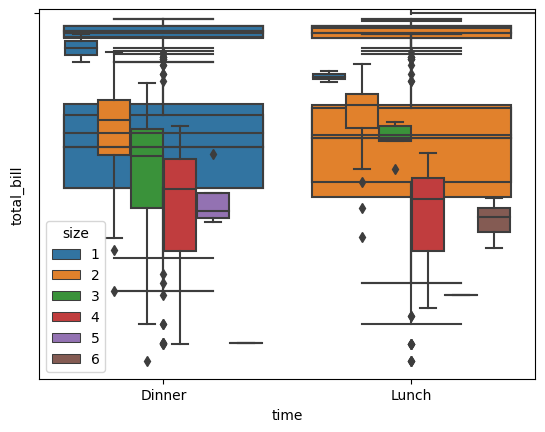

In [51]:
import pandas as pd
import seaborn as sns
from pingouin import ttest, anova, rm_anova

# Cargar los datos de tips.csv
datos = pd.read_csv('tips.csv')

# Hipótesis respecto a un valor
# La propina promedio es de 2.5 dolares
sns.boxplot(x='tip', data=datos)
ttest(datos['tip'], 2.5)

# Hipótesis respecto a dos muestras independientes
# Los hombres dejan una propina significativamente mayor que las mujeres
sns.boxplot(x='sex', y='tip', data=datos)
ttest(datos.loc[datos['sex'] == 'Male', 'tip'], datos.loc[datos['sex'] == 'Female', 'tip'])

# Hipótesis varias categorías
# La cantidad total de la factura difiere significativamente entre los días de la semana
sns.boxplot(x='day', y='total_bill', data=datos)
anova(data=datos, dv='total_bill', between='day')


# Hipótesis dos muestras relacionadas
# Hay una diferencia significativa en la propina promedio dejada en el almuerzo y en la cena
sns.boxplot(x='time', y='tip', data=datos)
ttest(datos.loc[datos['time'] == 'Lunch', 'tip'], datos.loc[datos['time'] == 'Dinner', 'tip'], paired=True)

# La cantidad total de la factura difiere significativamente entre fumadores y no fumadores
sns.boxplot(x='smoker', y='total_bill', data=datos)
ttest(x=datos['total_bill'][datos['smoker'] == 'Yes'], y=datos['total_bill'][datos['smoker'] == 'No'])


# El total de la cuenta promedio varía significativamente entre los días de la semana
sns.boxplot(x='day', y='total_bill', data=datos)
anova(data=datos, dv='total_bill', between='day')


# Hipótesis respecto a dos muestras independientes
# La propina promedio dejada por los fumadores es significativamente diferente a la de los no fumadores
sns.boxplot(x='smoker', y='tip', data=datos)
ttest(datos.loc[datos['smoker'] == 'Yes', 'tip'], datos.loc[datos['smoker'] == 'No', 'tip'])

# Hipótesis varias categorías
# El tamaño del grupo afecta significativamente el gasto total en la cuenta en diferentes momentos del día
sns.boxplot(x='time', y='total_bill', hue='size', data=datos)
anova(data=datos, dv='total_bill', between=['time', 'size'])
